

---

<center><h1>Assignment 4</h1></center>

---

# 1. <font color='#556b2f'> **Support Vector Machines with Synthetic Data**</font>, 50 points. 

For this problem, we will generate synthetic data for a nonlinear binary classification problem and partition it into training, validation and test sets. Our goal is to understand the behavior of SVMs with Radial-Basis Function (RBF) kernels with different values of $C$ and $\gamma$.

In [1]:
# DO NOT EDIT THIS FUNCTION; IF YOU WANT TO PLAY AROUND WITH DATA GENERATION, 
# MAKE A COPY OF THIS FUNCTION AND THEN EDIT
#
import numpy as np
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
%matplotlib inline          

def generate_data(n_samples, tst_frac=0.2, val_frac=0.2):
  # Generate a non-linear data set
  X, y = make_moons(n_samples=n_samples, noise=0.25, random_state=42)
   
  # Take a small subset of the data and make it VERY noisy; that is, generate outliers
  m = 30
  np.random.seed(30)  # Deliberately use a different seed
  ind = np.random.permutation(n_samples)[:m]
  X[ind, :] += np.random.multivariate_normal([0, 0], np.eye(2), (m, ))
  y[ind] = 1 - y[ind]

  # Plot this data
  cmap = ListedColormap(['#b30065', '#178000'])  
  plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, edgecolors='k')       
  
  # First, we use train_test_split to partition (X, y) into training and test sets
  X_trn, X_tst, y_trn, y_tst = train_test_split(X, y, test_size=tst_frac, 
                                                random_state=42)

  # Next, we use train_test_split to further partition (X_trn, y_trn) into training and validation sets
  X_trn, X_val, y_trn, y_val = train_test_split(X_trn, y_trn, test_size=val_frac, 
                                                random_state=42)
  
  return (X_trn, y_trn), (X_val, y_val), (X_tst, y_tst)

In [2]:
#
#  DO NOT EDIT THIS FUNCTION; IF YOU WANT TO PLAY AROUND WITH VISUALIZATION, 
#  MAKE A COPY OF THIS FUNCTION AND THEN EDIT 
#

def visualize(models, param, X, y):
  # Initialize plotting
  if len(models) % 3 == 0:
    nrows = len(models) // 3
  else:
    nrows = len(models) // 3 + 1
    
  fig, axes = plt.subplots(nrows=nrows, ncols=3, figsize=(15, 5.0 * nrows))
  cmap = ListedColormap(['#b30065', '#178000'])

  # Create a mesh
  xMin, xMax = X[:, 0].min() - 1, X[:, 0].max() + 1
  yMin, yMax = X[:, 1].min() - 1, X[:, 1].max() + 1
  xMesh, yMesh = np.meshgrid(np.arange(xMin, xMax, 0.01), 
                             np.arange(yMin, yMax, 0.01))

  for i, (p, clf) in enumerate(models.items()):
    # if i > 0:
    #   break
    r, c = np.divmod(i, 3)
    ax = axes[r, c]

    # Plot contours
    zMesh = clf.decision_function(np.c_[xMesh.ravel(), yMesh.ravel()])
    zMesh = zMesh.reshape(xMesh.shape)
    ax.contourf(xMesh, yMesh, zMesh, cmap=plt.cm.PiYG, alpha=0.6)

    if (param == 'C' and p > 0.0) or (param == 'gamma'):
      ax.contour(xMesh, yMesh, zMesh, colors='k', levels=[-1, 0, 1], 
                 alpha=0.5, linestyles=['--', '-', '--'])

    # Plot data
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, edgecolors='k')       
    ax.set_title('{0} = {1}'.format(param, p))

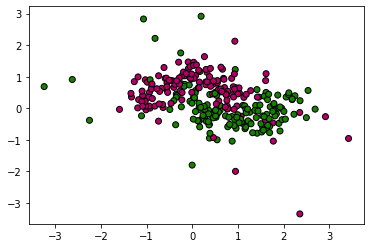

In [3]:
# Generate the data
n_samples = 300    # Total size of data set 
(X_trn, y_trn), (X_val, y_val), (X_tst, y_tst) = generate_data(n_samples)

---
### **a**. (25 points)  The effect of the regularization parameter, $C$
Complete the Python code snippet below that takes the generated synthetic 2-d data as input and learns non-linear SVMs. Use scikit-learn's [SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) function to learn SVM models with **radial-basis kernels** for fixed $\gamma$ and various choices of $C \in \{10^{-3}, 10^{-2}\, \cdots, 1, \, \cdots\, 10^5\}$. The value of $\gamma$ is fixed to $\gamma = \frac{1}{d \cdot \sigma_X}$, where $d$ is the data dimension and $\sigma_X$ is the standard deviation of the data set $X$. SVC can automatically use these setting for $\gamma$ if you pass the argument gamma = 'scale' (see documentation for more details).

**Plot**: For each classifier, compute **both** the **training error** and the **validation error**. Plot them together, making sure to label the axes and each curve clearly.

**Discussion**: How do the training error and the validation error change with $C$? Based on the visualization of the models and their resulting classifiers, how does changing $C$ change the models? Explain in terms of minimizing the SVM's objective function $\frac{1}{2} \mathbf{w}^\prime \mathbf{w} \, + \, C \, \Sigma_{i=1}^n \, \ell(\mathbf{w} \mid \mathbf{x}_i, y_i)$, where $\ell$ is the hinge loss for each training example $(\mathbf{x}_i, y_i)$.

**Final Model Selection**: Use the validation set to select the best the classifier corresponding to the best value, $C_{best}$. Report the accuracy on the **test set** for this selected best SVM model. _Note: You should report a single number, your final test set accuracy on the model corresponding to $C_{best}$_.

In [4]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

The best values of C are: 
[1.0, 10.0, 100.0, 10000.0]


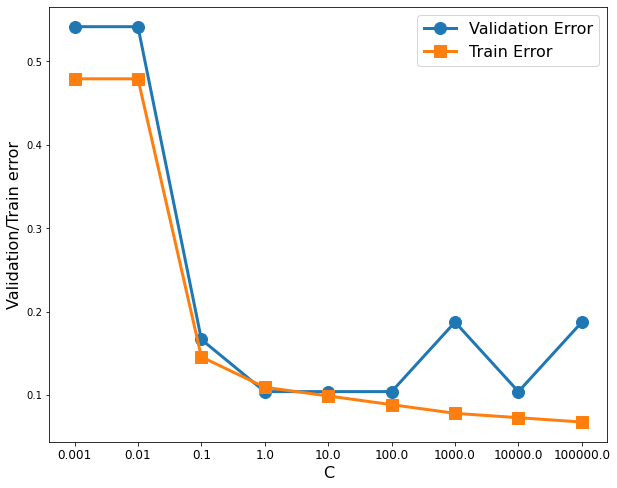

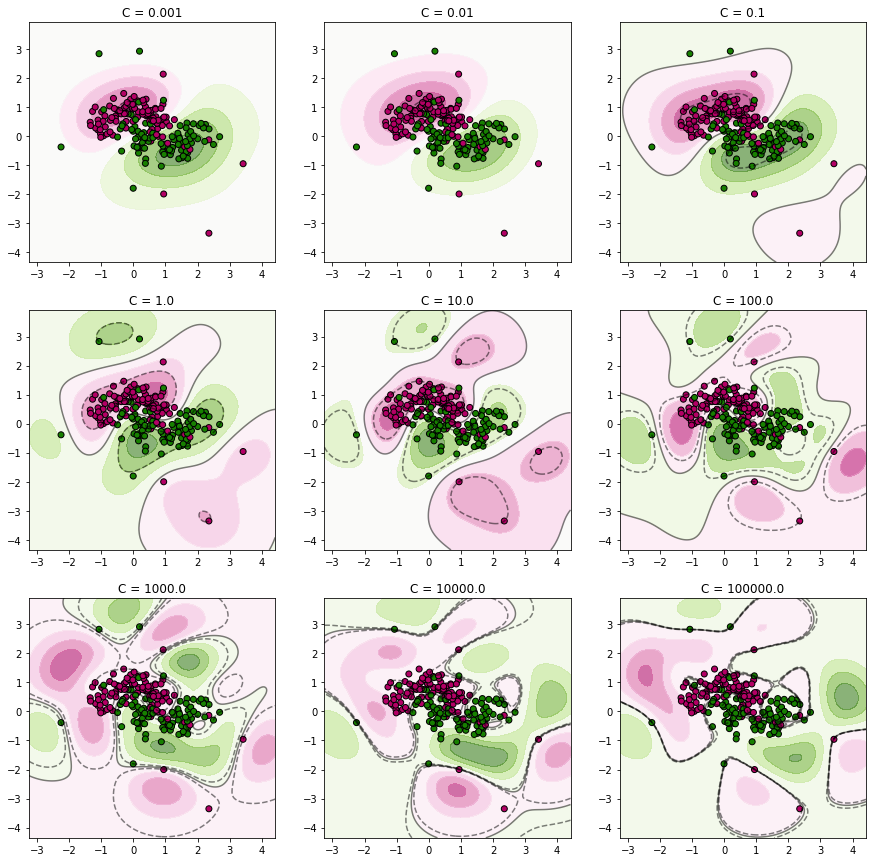

In [5]:
# Learn support vector classifiers with a radial-basis function kernel with 
# fixed gamma = 1 / (n_features * X.std()) and different values of C
C_range = np.arange(-3.0, 6.0, 1.0)
C_values = np.power(10.0, C_range)

cValuesList = list(C_values)

models = dict()
trainErr = dict()
validErr = dict()

for index, C in enumerate(C_values):
    svm = SVC(C = C, gamma='scale', kernel='rbf', random_state=0)
    svm.fit(X_trn, y_trn)
    models[C]= svm
    y_train_pred = svm.predict(X_trn)
    y_valid_pred = svm.predict(X_val)
    trainErr[index]= 1 - accuracy_score(y_trn, y_train_pred)
    validErr[index]= 1 - accuracy_score(y_val, y_valid_pred)
  
plt.figure(figsize=(10,8))
plt.plot(list(validErr.keys()), list(validErr.values()), marker='o', linewidth=3, markersize=12)
plt.plot(list(trainErr.keys()), list(trainErr.values()), marker='s', linewidth=3, markersize=12)
plt.xlabel('C', fontsize=16)
plt.ylabel('Validation/Train error', fontsize=16)
plt.xticks(list(trainErr.keys()), ('0.001', '0.01', '0.1', '1.0', '10.0','100.0','1000.0','10000.0','100000.0'), fontsize=12)
plt.legend(['Validation Error', 'Train Error'], fontsize=16)

visualize(models, 'C', X_trn, y_trn)

minError= 1
noOfModelsWithMinError= 1
bestModels= []

for value in validErr:
    if validErr[value] < minError:
        minError = validErr[value]
        bestModels.clear()
        bestModels.append(cValuesList[value])
    elif validErr[value] == minError:
        noOfModelsWithMinError += 1
        bestModels.append(cValuesList[value])
        
print("The best values of C are: ")
print(bestModels)

# Discussion
    
    By observing the above graphs, we can conclude that: 
        => The training error decreases when the value of C increases.
        => The validation error is decreasing until C value approches 100, but for values greater than 100, there is alternate increase and decrease to the validaton error.

    => 'C' is used as a regularization constant. 
    => As we increase the value of 'C', we penalize the slack varibles more.
    => For a larger value of 'C', a very small margin is accepted which provides better test accuracy.
    => For small values of 'C', a large margin is accepted. This would result in a simpler learning fuction but will come at  the cost of accuracy. 
    => These properties are evident in the models above. Large C makes the cost of misclassification high ('hard margin"),  thus  forcing the algorithm to explain the input data stricter and potentially overfit which explains the increase in         validation error.  


    Choosing the C that gives the minimum Test set error:{1:0.167, 10:0.167, 100:0.15, 10000:0.199}
        

In [6]:
svm = SVC(C = 100, gamma = 'scale', kernel = 'rbf')
svm.fit(X_trn, y_trn)
y_tst_pred = svm.predict(X_tst)
tstErr = 1 - accuracy_score(y_tst, y_tst_pred)
print('Evaluated Test Error is', tstErr, "and accuracy is ", accuracy_score(y_tst, y_tst_pred) * 100)

Evaluated Test Error is 0.15000000000000002 and accuracy is  85.0


# Conclusion: Best value of C = 100, gives an accuracy of 85%
----------------------------------------------------------------------------------------

# ---
### **b**. (25 points)  The effect of the RBF kernel parameter, $\gamma$
Complete the Python code snippet below that takes the generated synthetic 2-d data as input and learns various non-linear SVMs. Use scikit-learn's [SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) function to learn SVM models with **radial-basis kernels** for fixed $C$ and various choices of $\gamma \in \{10^{-2}, 10^{-1}\, 1, 10, \, 10^2 \, 10^3\}$. The value of $C$ is fixed to $C = 10$.

**Plot**: For each classifier, compute **both** the **training error** and the **validation error**. Plot them together, making sure to label the axes and each curve clearly.

**Discussion**: How do the training error and the validation error change with $\gamma$? Based on the visualization of the models and their resulting classifiers, how does changing $\gamma$ change the models? Explain in terms of the functional form of the RBF kernel, $\kappa(\mathbf{x}, \,\mathbf{z}) \, = \, \exp(-\gamma \cdot \|\mathbf{x} - \mathbf{z} \|^2)$

**Final Model Selection**: Use the validation set to select the best the classifier corresponding to the best value, $\gamma_{best}$. Report the accuracy on the **test set** for this selected best SVM model. _Note: You should report a single number, your final test set accuracy on the model corresponding to $\gamma_{best}$_.

The best values of gamma are: 
[1.0, 10.0]


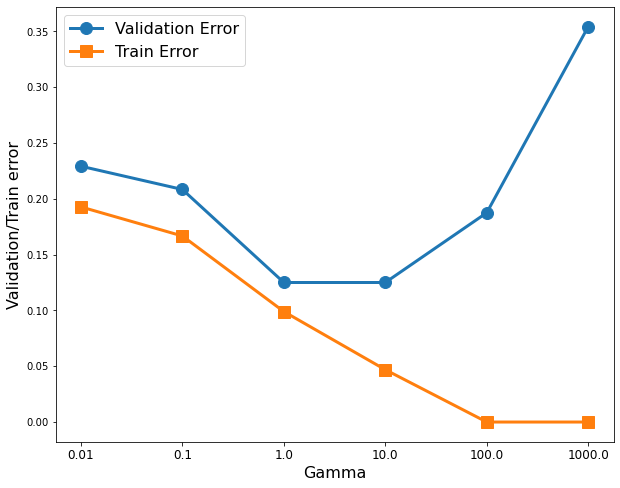

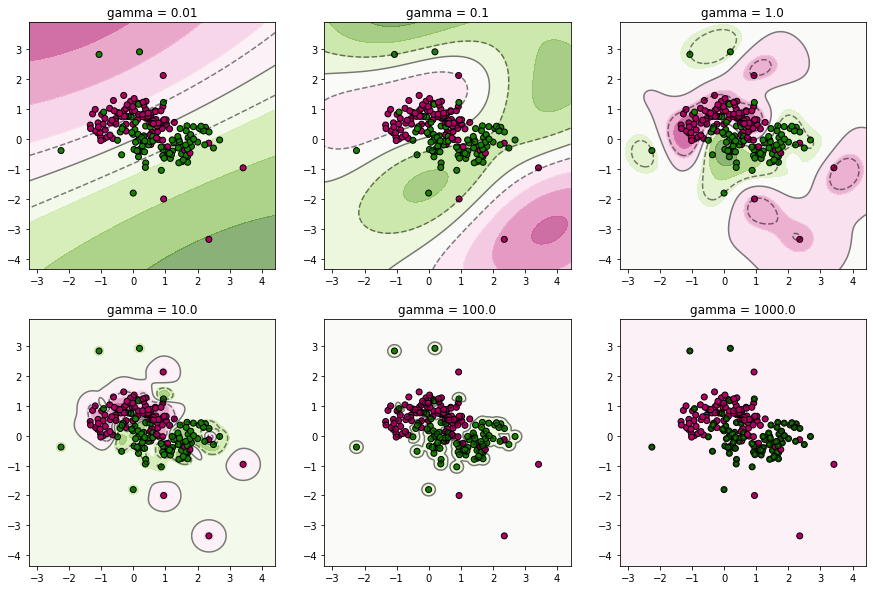

In [7]:
# Learn support vector classifiers with a radial-basis function kernel with 
# fixed C = 10.0 and different values of gamma
gamma_range = np.arange(-2.0, 4.0, 1.0)
gamma_values = np.power(10.0, gamma_range)

gammaValueList = list(gamma_values)

models = dict()
trnErr = dict()
valErr = dict()

for index, G in enumerate(gamma_values):
    svm = SVC(C = 10, gamma = G, kernel = 'rbf')
    svm.fit(X_trn, y_trn)
    models[G] = svm
    y_trn_pred = svm.predict(X_trn)
    y_val_pred = svm.predict(X_val)
    trnErr[index] = 1 - accuracy_score(y_trn,y_trn_pred)
    valErr[index] = 1 - accuracy_score(y_val,y_val_pred)
    
plt.figure(figsize=(10, 8))
plt.plot(list(valErr.keys()), list(valErr.values()), marker='o', linewidth=3, markersize=12)
plt.plot(list(trnErr.keys()), list(trnErr.values()), marker='s', linewidth=3, markersize=12)
plt.xlabel('Gamma', fontsize = 16)
plt.ylabel('Validation/Train error', fontsize=16)
plt.xticks(list(trnErr.keys()), ( '0.01', '0.1', '1.0', '10.0','100.0','1000.0'), fontsize = 12)
plt.legend(['Validation Error', 'Train Error'], fontsize = 16)
    
visualize(models, 'gamma', X_trn, y_trn)

minError = 1
noOfModelsWithMinError = 1
bestModels = []

for value in valErr:
    if valErr[value] < minError:
        minError = valErr[value]
        bestModels.clear()
        bestModels.append(gammaValueList[value])
    elif valErr[value] == minError:
        noOfModelsWithMinError += 1
        bestModels.append(gammaValueList[value])
        
print("The best values of gamma are: ")
print(bestModels)

# Discussion
    By observing the above graphs, we can conclude that:
    => The training error decreases trend with an increase in the value of gamma. 
    => Validation error, decreases for smaller values of gamma but increases for higher values of gamma.

    => The gamma parameter defines how far the influence of a single training example reaches, with low values meaning ‘far’ and high values meaning ‘close’. 
    => The gamma parameters can be seen as the inverse of the radius of influence of samples selected by the model as support vectors.
    => When gamma is low, the decision region is very broad. 
    => When gamma is high,the decision boundary is high, which creates islands of decision-boundaries around data points.

    Validation error is minimum for 2 cases: 1 and 10
    Choosing the model that gives the least Test set error
    Test error { 1:0.166, 10:0.1663 }.

In [8]:
svm = SVC(C = 10, gamma = 1.0, kernel = 'rbf')
svm.fit(X_trn, y_trn)
y_tstpred = svm.predict(X_tst)
tstErr = accuracy_score(y_tst, y_tstpred) * 100
print('Evaluated Test Accuracy was  : '+ str(tstErr)+' %')

Evaluated Test Accuracy was  : 83.33333333333334 %


# Conclusion: The best value of Gamma = 10 and gives an accuracy of 83.33%

---
# 2. <font color='#556b2f'> **Breast Cancer Diagnosis with Support Vector Machines**</font>, 25 points. 

For this problem, we will use the [Wisconsin Breast Cancer](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)) data set, which has already been pre-processed and partitioned into training, validation and test sets. Numpy's [loadtxt](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.loadtxt.html) command can be used to load CSV files.

In [9]:
# Load the Breast Cancer Diagnosis data set; download the files from eLearning
# CSV files can be read easily using np.loadtxt()

cancer_trn=np.loadtxt(open("wdbc_trn.csv", "rb"), delimiter=",")
Xtrn=cancer_trn[:,1:]
ytrn=cancer_trn[:,0]
cancer_tst=np.loadtxt(open("wdbc_tst.csv", "rb"), delimiter=",")
Xtst=cancer_tst[:,1:]
ytst=cancer_tst[:,0]
cancer_val=np.loadtxt(open("wdbc_val.csv", "rb"), delimiter=",")
Xval=cancer_val[:,1:]
yval=cancer_val[:,0]

Use scikit-learn's [SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) function to learn SVM models with **radial-basis kernels** for **each combination** of $C \in \{10^{-2}, 10^{-1}, 1, 10^1, \, \cdots\, 10^4\}$ and $\gamma \in \{10^{-3}, 10^{-2}\, 10^{-1}, 1, \, 10, \, 10^2\}$. Print the tables corresponding to the training and validation errors.

**Final Model Selection**: Use the validation set to select the best the classifier corresponding to the best parameter values, $C_{best}$ and $\gamma_{best}$. Report the accuracy on the **test set** for this selected best SVM model. _Note: You should report a single number, your final test set accuracy on the model corresponding to $C_{best}$ and $\gamma_{best}$_.

In [13]:
cRange = np.arange(-2.0, 5.0, 1.0)
cValues = np.power(10.0, cRange)
cValuesList = list(cValues)

gRange = np.arange(-3.0, 3.0, 1.0)
gValues = np.power(10.0, gRange)
gValuesList = list(gValues)

In [14]:
bestCvalues = []
bestGvalues = []
testErr = []
minErr = 1

for index1, i in  enumerate(cValues):
    for index2, j in enumerate(gValues):
        svm = SVC(C = i,gamma = j, kernel = 'rbf')
        svm.fit(Xtrn, ytrn)
        
        y_trn_pred = svm.predict(Xtrn)
        y_val_pred = svm.predict(Xval)
        y_tst_pred = svm.predict(Xtst)
        
        val_err = 1 - accuracy_score(yval, y_val_pred)
        tst_err = 1 - accuracy_score(ytst, y_tst_pred)
        
        if(val_err < minErr ):
            minErr = val_err
            
            bestCvalues.clear()
            bestGvalues.clear()
            testErr.clear()
            
            bestCvalues.append(cValues[index1])
            bestGvalues.append(gValues[index2])
            testErr.append(tst_err)
        elif (val_err == minErr):
                bestCvalues.append(cValues[index1])
                bestGvalues.append(gValues[index2])
                testErr.append(tst_err)
                
print('Best C values: ', bestCvalues)                    
print('Best Gamma values: ', bestGvalues) 
print('Test Error: ', testErr) 
print('Minimum validation error: ', minErr)
print('Max Validation accuracy: ', str((1-minErr)*100))
    

Best C values:  [100.0, 1000.0, 10000.0, 10000.0]
Best Gamma values:  [0.01, 0.01, 0.001, 0.01]
Test Error:  [0.034782608695652195, 0.05217391304347829, 0.060869565217391286, 0.05217391304347829]
Minimum validation error:  0.02608695652173909
Max Validation accuracy:  97.3913043478261


# Best value of C = 100 

# Best value of Gamma = 0.01

# Accuracy on Test Dataset = 96.5% with C=100, gamma= 0.01

---
# 3. <font color='#556b2f'> **Breast Cancer Diagnosis with $k$-Nearest Neighbors**</font>, 25 points. 

Use scikit-learn's [k-nearest neighbor](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) classifier to learn models for Breast Cancer Diagnosis with $k \in \{1, \, 5, \, 11, \, 15, \, 21\}$, with the kd-tree algorithm.

**Plot**: For each classifier, compute **both** the **training error** and the **validation error**. Plot them together, making sure to label the axes and each curve clearly.

**Final Model Selection**: Use the validation set to select the best the classifier corresponding to the best parameter value, $k_{best}$. Report the accuracy on the **test set** for this selected best kNN model. _Note: You should report a single number, your final test set accuracy on the model corresponding to $k_{best}$_.

**Discussion**: Which of these two approaches, SVMs or kNN, would you prefer for this classification task? Explain.

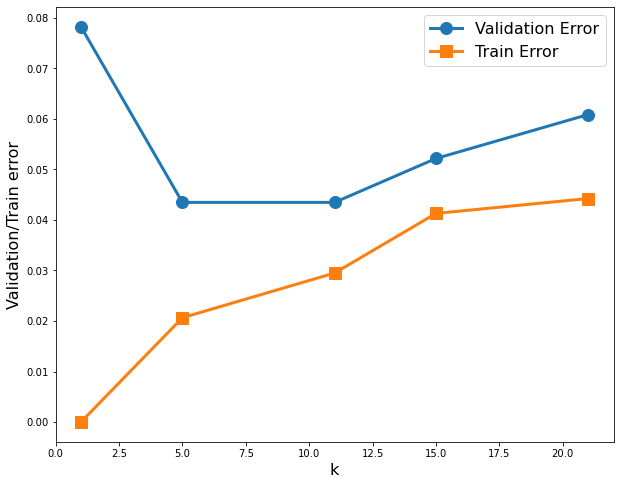

In [15]:
k = [1, 5, 11, 15, 21]
trnError = []
valError = []
for index, val in enumerate(k):
    neigh = KNeighborsClassifier(n_neighbors = val, algorithm = 'kd_tree')
    neigh.fit(Xtrn, ytrn) 
    ytrn_pred = neigh.predict(Xtrn)
    yval_pred = neigh.predict(Xval)
    trnError.append(1 - accuracy_score(ytrn, ytrn_pred))
    valError.append(1 - accuracy_score(yval, yval_pred))
    
plt.figure(figsize=(10, 8))
plt.plot(k, valError, marker = 'o', linewidth = 3, markersize = 12)
plt.plot(k, trnError, marker = 's', linewidth = 3, markersize = 12)
plt.xlabel('k', fontsize = 16)
plt.ylabel('Validation/Train error', fontsize = 16)
plt.legend(['Validation Error', 'Train Error'], fontsize = 16)

k=5 and k=11 both give give the least validation error. But test accuracy for k=5 is 95.65% while that for k=11 is 97.39%

# Best value of k is 11


In [16]:
neigh = KNeighborsClassifier(n_neighbors = 11, algorithm = 'kd_tree')
neigh.fit(Xtrn, ytrn) 
ytst_pred = neigh.predict(Xtst)
print('Test Accuracy: ', accuracy_score(ytst, ytst_pred)*100)

Test Accuracy:  97.3913043478261


# Test Accuracy for kNN is 97.39 %

# Conclusion: kNN gives a better accuracy of 97.391% whereas SVM gives an accuracy of 96.5% on the test data. Also, kNN works better for data with more number of attributes. The given dataset has about 30 attributes and hence kNN is the preffered classifier.

